<a href="https://colab.research.google.com/github/SoorWhy/capstone-design/blob/seongmin/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


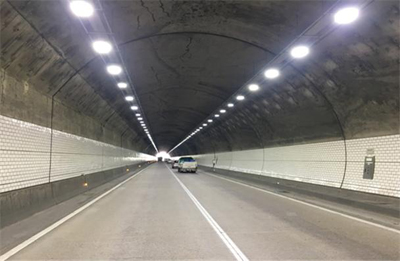

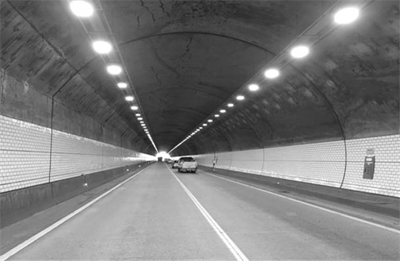

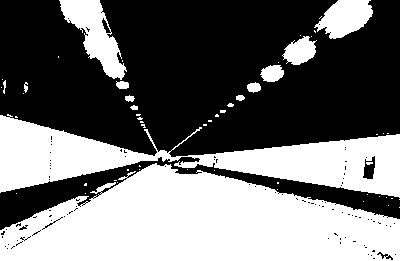

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 로드
src1 = cv2.imread('/content/gdrive/My Drive/capston_test/images5.jpg')
src = cv2.imread('/content/gdrive/My Drive/capston_test/images5.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# 이진화
_, binary = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY)

cv2_imshow(src1)
cv2_imshow(src)
cv2_imshow(binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

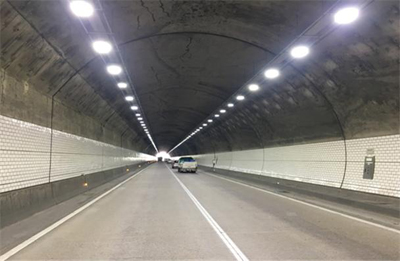

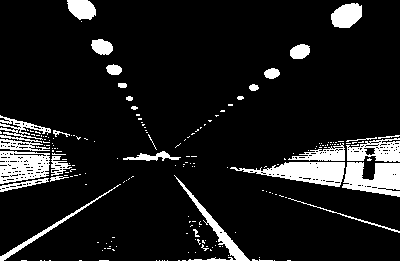

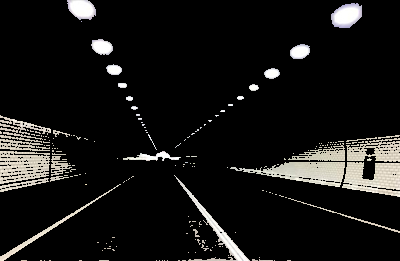

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 로드
src = cv2.imread('/content/gdrive/My Drive/capston_test/images5.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

# HSV 색상 공간으로 변환
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# 밝은 색상 범위 설정 (H: 0~179, S: 0~255, V: 0~255)
lower_hsv = np.array([0, 0, 200])
upper_hsv = np.array([179, 255, 255])

# HSV 이미지에서 밝은 색상 범위에 해당하는 부분을 마스크 이미지로 생성
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# 원본 이미지에서 마스크 이미지에 해당하는 부분만 추출
result = cv2.bitwise_and(src, src, mask=mask)

cv2_imshow(src)
cv2_imshow(mask)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


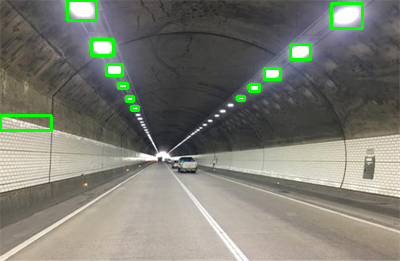

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 로드
src = cv2.imread('/content/gdrive/My Drive/capston_test/images5.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

# HSV 색상 공간으로 변환
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# 밝은 색상 범위 설정 (H: 0~179, S: 0~255, V: 0~255)
lower_hsv = np.array([0, 0, 200])
upper_hsv = np.array([179, 255, 255])

# HSV 이미지에서 밝은 색상 범위에 해당하는 부분을 마스크 이미지로 생성
mask = cv2.inRange(hsv, lower_hsv, upper_hsv)

# 이미지의 상단 50% 부분에서만 컨투어 탐색
height, width = mask.shape
mask_upper = mask[0:height//2, :]
contours, _ = cv2.findContours(mask_upper, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 컨투어 그리기
for contour in contours:
    # 컨투어의 영역이 일정 크기 이상이고 일정 크기 이하인 경우만 선택 (이 값은 조정 가능)
    if cv2.contourArea(contour) > 10 and cv2.contourArea(contour) < 600:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(src)
cv2.waitKey(0)
cv2.destroyAllWindows()


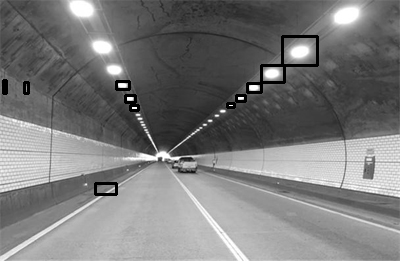

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 로드
src = cv2.imread('/content/gdrive/My Drive/capston_test/images5.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# 이진화
_, binary = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY)

# 컨투어 탐색
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    # 컨투어의 영역이 일정 크기 이상이고 일정 크기 이하인 경우만 선택 (이 값은 조정 가능)
    if cv2.contourArea(contour) > 10 and cv2.contourArea(contour) < 600:
        x, y, w, h = cv2.boundingRect(contour)

        # 컨투어의 바운딩 박스를 이용하여 마스크 생성
        mask = np.zeros_like(src)
        mask[y:y+h, x:x+w] = 255

        # 마스크 확장
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        mask = cv2.dilate(mask, kernel, iterations=1)

        # 확장한 마스크와 원본 이미지와의 교차 영역의 평균 밝기 계산
        mean_brightness = cv2.mean(src, mask=mask)[0]

        # 평균 밝기가 일정 값 이하면 컨투어 그리기 (이 값은 조정 가능)
        if mean_brightness < 200:
            cv2.rectangle(src, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(src)
cv2.waitKey(0)
cv2.destroyAllWindows()


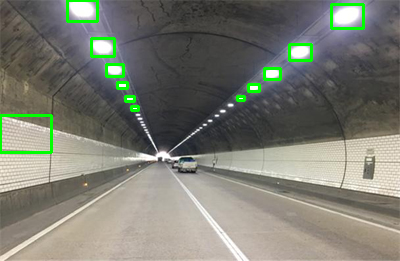

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 로드
src = cv2.imread('/content/gdrive/My Drive/capston_test/images5.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 히스토그램 평활화
equ = cv2.equalizeHist(gray)

# 밝기 기반 필터링 (임계값은 조정 가능)
_, binary = cv2.threshold(equ, 200, 255, cv2.THRESH_BINARY)

# 컨투어 검출
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 컨투어 필터링 및 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # 컨투어의 위치와 크기를 이용한 필터링 (이 값들은 조정 가능)
    if y < binary.shape[0] // 2 and w * h > 20:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 결과 출력
cv2_imshow(src)
cv2.waitKey(0)
cv2.destroyAllWindows()


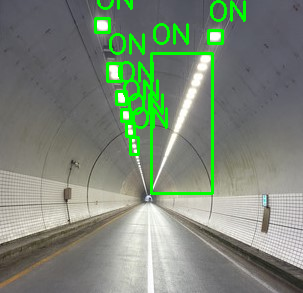

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 로드
src = cv2.imread('/content/gdrive/My Drive/capston_test/images7.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 히스토그램 평활화
equ = cv2.equalizeHist(gray)

# 밝기 기반 필터링 (임계값은 조정 가능)
_, binary = cv2.threshold(equ, 200, 255, cv2.THRESH_BINARY)

# 컨투어 검출
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 컨투어 필터링 및 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # 컨투어의 위치와 크기를 이용한 필터링 (이 값들은 조정 가능)
    if y < binary.shape[0] // 2 and w * h > 20:
        # 조명 부분 ROI 설정
        roi = gray[y:y+h, x:x+w]
        # ROI의 평균 픽셀 값 계산
        mean_val = np.mean(roi)
        # 임계값 설정 (이 값은 조정 가능)
        threshold = 127
        # 조명 on/off 판별
        if mean_val > threshold:
            cv2.putText(src, 'ON', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
        else:
            cv2.putText(src, 'OFF', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 결과 출력
cv2_imshow(src)
cv2.waitKey(0)
cv2.destroyAllWindows()

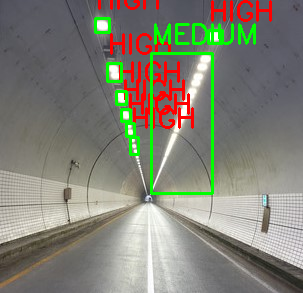

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 이미지 로드
src = cv2.imread('/content/gdrive/My Drive/capston_test/images7.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# 히스토그램 평활화
equ = cv2.equalizeHist(gray)

# 밝기 기반 필터링 (임계값은 조정 가능)
_, binary = cv2.threshold(equ, 200, 255, cv2.THRESH_BINARY)

# 컨투어 검출
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 컨투어 필터링 및 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    # 컨투어의 위치와 크기를 이용한 필터링 (이 값들은 조정 가능)
    if y < binary.shape[0] // 2 and w * h > 20:
        # 조명 부분 ROI 설정
        roi = gray[y:y+h, x:x+w]
        # ROI의 평균 픽셀 값 계산
        mean_val = np.mean(roi)
        # 빛의 세기 판별 (이 값들은 조정 가능)
        if mean_val < 85:
            cv2.putText(src, 'LOW', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)
        elif mean_val < 170:
            cv2.putText(src, 'MEDIUM', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0), 2)
        else:
            cv2.putText(src, 'HIGH', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 255, 0), 2)

# 결과 출력
cv2_imshow(src)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#123123

브랜치 테스트 123123